In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###########################################################
# Load Classifier and Data
###########################################################
pipeline = joblib.load('pipeline_classifier.pkl')
training_data = pd.read_csv("./data_train.csv")

y_train = training_data['SOURCE'].map({'out': 0, 'in': 1})
X_train = training_data.drop(columns=['SOURCE'])

# Preprocess training data
X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)

In [2]:
###########################################################
# Compute Threshold and k_max
###########################################################
def compute_threshold_and_kmax(X_train, threshold_percentile=5):
    """
    Compute the threshold and k_max based on training distances
    - X_train: The training feature matrix (normalized).
    - threshold_percentile: Percentile for the distance threshold.

    Returns:
    - threshold: The distance threshold for neighbors.
    - k_max: The maximum number of neighbors within the threshold.
    - upper_triangle: Array of unique pairwise distances.
    """
    # Compute pairwise distances
    distances = np.linalg.norm(X_train[:, np.newaxis] - X_train, axis=2)
    upper_triangle = distances[np.triu_indices(distances.shape[0], k=1)]  # Unique pairwise distances
    threshold = np.percentile(upper_triangle, threshold_percentile)

    # Compute k_max (average number of neighbors within the threshold)
    neighbors_within_threshold = np.sum(distances < threshold, axis=1) - 1
    k_max = int(np.mean(neighbors_within_threshold))

    return threshold, k_max, upper_triangle


###########################################################
# Visualization
###########################################################
def plot_distance_distribution(pairwise_distances, threshold):
    """
    Plot the distribution of pairwise distances with a threshold line.

    Parameters:
    - pairwise_distances: 1D array of unique pairwise distances.
    - threshold: Distance threshold.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(pairwise_distances, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold:.2f}')
    plt.title("Distribution of Pairwise Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


def print_percentiles(pairwise_distances, percentiles):
    percentile_values = {f"{p}th": np.percentile(pairwise_distances, p) for p in percentiles}
    print("Percentiles of Pairwise Distances:")
    for key, value in percentile_values.items():
        print(f"{key}: {value:.4f}")
    return percentile_values

In [3]:
###########################################################
# Execution
###########################################################

# Compute threshold and k_max
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, threshold_percentile=5)

# Print the computed threshold and k_max
print(f"Computed Threshold: {threshold:.4f}")
print(f"Computed k_max: {k_max}")

# Print percentiles
percentiles_to_compute = [0.5, 0.75, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 7.5, 10, 25, 50, 75, 90]
percentile_values = print_percentiles(pairwise_distances, percentiles_to_compute)

Computed Threshold: 0.2215
Computed k_max: 198
Percentiles of Pairwise Distances:
0.5th: 0.1239
0.75th: 0.1357
1th: 0.1453
1.5th: 0.1601
2th: 0.1720
2.5th: 0.1824
3th: 0.1915
3.5th: 0.1998
4th: 0.2074
4.5th: 0.2146
5th: 0.2215
7.5th: 0.2517
10th: 0.2782
25th: 0.4228
50th: 1.0065
75th: 1.0933
90th: 1.1722


Threshold: 0.08710267101656967, k_max: 3


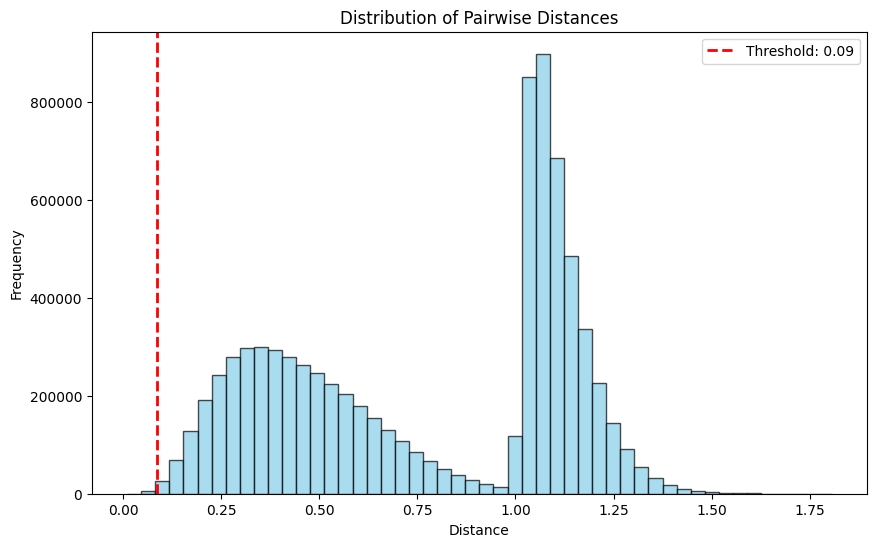

In [4]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, .1)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.10621038957776219, k_max: 9


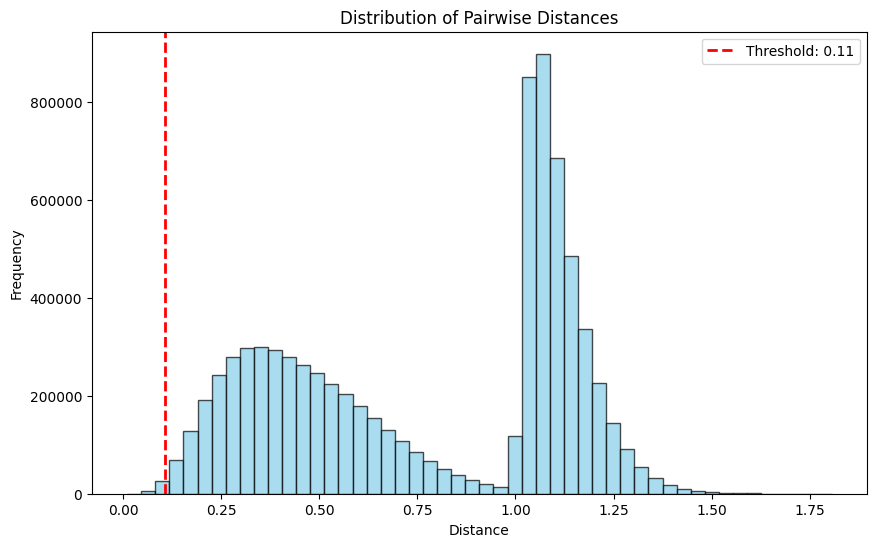

In [5]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, .25)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.12385165181081716, k_max: 19


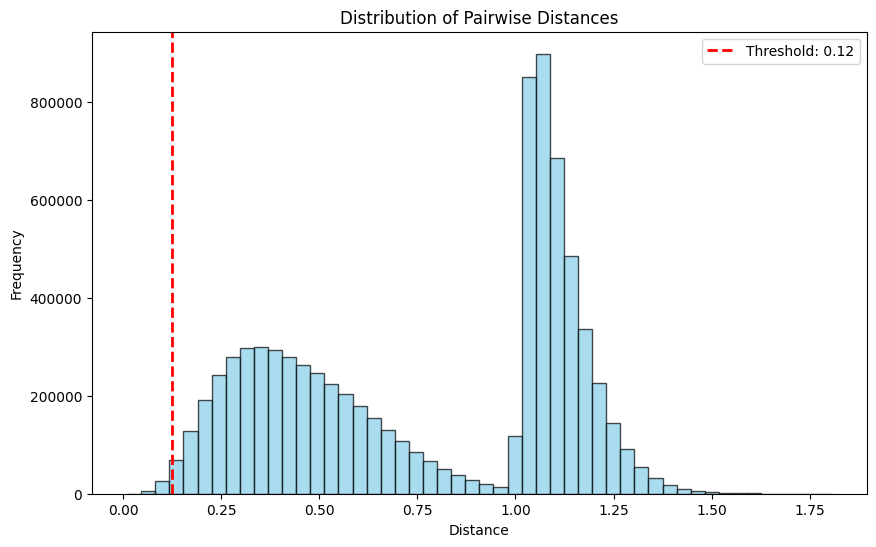

In [6]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, .5)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.13574871780754835, k_max: 29


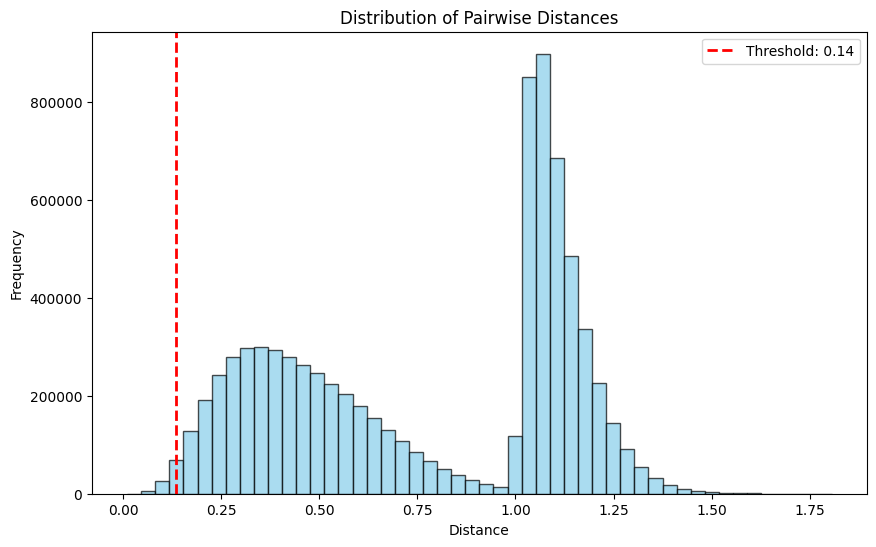

In [7]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, .75)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.14525824829839953, k_max: 39


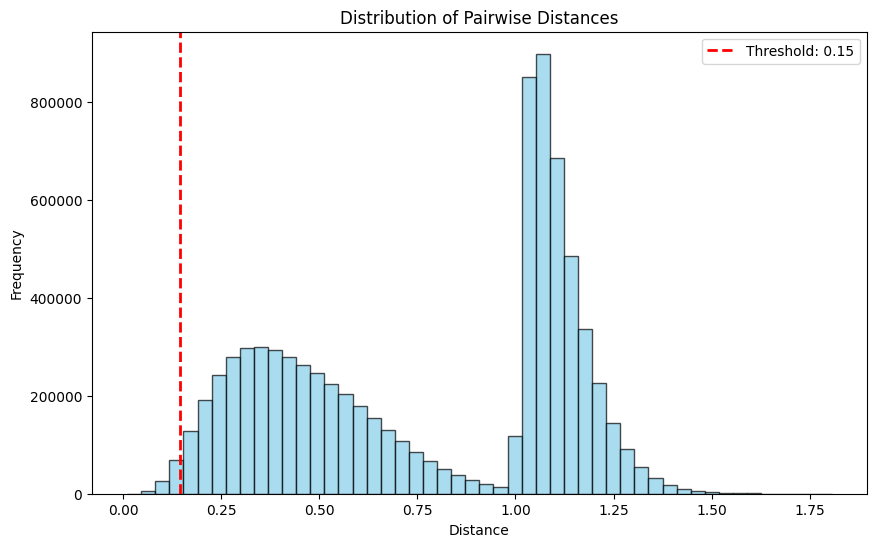

In [8]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 1)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)